In [22]:
import sqlite3

- `sqlite3`:  
    - An embedded, server-less relational **database management** system
    - Used to create a database, define tables, insert and change rows, run queries and manage an SQLite database file


In [23]:
conn = sqlite3.connect(':memory:')

`sqlite3.connect(':memory:')`:  
- Creates a temporary **in-memory** database that resides in RAM rather than being stored on disk
- **No physical `.db` file** is created.

In [24]:
conn = sqlite3.connect('sample.sqlite')

`sqlite3.connect('sample.sqlite')`:
- **Connects to** an SQLite database file named `sample.sqlite`
- If the file **already exists**, it will open the *existing database*
- If the file **does not exist**, SQLite **creates a new file** automatically

In [16]:
conn.close()

`conn.close()`:
- When you connect to an SQLite database using `sqlite3.connect()`, the connection **uses system resources** (e.g., memory, file handles)
- `conn.close()` **frees up** these resources
- **Changes** can be saved using `conn.commit()`

In [17]:
with sqlite3.connect('sample.sqlite') as conn:
    pass

`sqlite3.connect('sample.sqlite')`:
- Opens (or creates) a database file called sample.sqlite.
- If the file **doesn't exist**, SQLite automatically creates it.

`with` **Statement (Context Manager)**:
- The with statement ensures that:
    - The connection is **properly closed** when exiting the block.
    - If any **changes** (like `INSERT`, `UPDATE`, `DELETE`) were made inside the block, **they are automatically committed**.
    - If an **error occurs**, the connection **rolls back** changes.
    
`pass`:
- This is a **placeholder** that does nothing.
- The connection opens but **no operations are performed**.

In [18]:
conn = sqlite3.connect(':memory:')

- Same as code above

In [25]:
cursor = conn.cursor()

`conn.cursor()`:  
- This method creates a **cursor object**.
- The cursor allows interaction with the database:  
    ✅ Running **SQL queries** (`SELECT`, `INSERT`, `UPDATE`, `DELETE`, etc.).  
    ✅ Fetching results from a **query**.

Assigning to `cursor`  
- The cursor object is stored in the variable `cursor`.
- You can now use `cursor.execute(...)` to send SQL commands.


cursor.execute("""
CREATE TABLE mytable (
    col1 TEXT,
    col2 INTEGER,
    col3 REAL,
    col4 TEXT
);
""")

`cursor.execute(...)`
- This **executes** the SQL command using the cursor.
- It sends the SQL statement to the **SQLite database** to create the table.
    
`CREATE TABLE mytable`
- This **creates a table** named `mytable` if it does not already exist.
- **Table structure** will look like this:
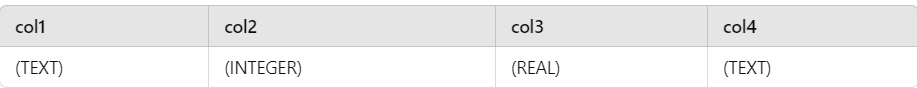

In [26]:
result = conn.execute(
    """
    PRAGMA table_info('mytable')
    """
)
for row in result:
    print(row)

(0, 'col1', 'TEXT', 0, None, 0)
(1, 'col2', 'INTEGER', 0, None, 0)
(2, 'col3', 'REAL', 0, None, 0)
(3, 'col4', 'TEXT', 0, None, 0)


`PRAGMA table_info('mytable')`:  
- is an SQLite command that returns information about all the **columns** of a given table (`mytable`). 

`result = conn.execute(...)`:  
- runs the query.  
    
`for row in result: print(row)`:  
- iterates through the results and prints each column's metadata.

In [27]:
result = conn.execute(
    """
    PRAGMA table_info('mytable')
    """
)
result.fetchall()

[(0, 'col1', 'TEXT', 0, None, 0),
 (1, 'col2', 'INTEGER', 0, None, 0),
 (2, 'col3', 'REAL', 0, None, 0),
 (3, 'col4', 'TEXT', 0, None, 0)]

`conn.execute(""" PRAGMA table_info('mytable') """)`:  
- This **executes** the SQLite **PRAGMA** command to get the **schema information** (*=Metadata "data about data"*) for the table mytable.
- It returns details about all the **columns** in the table.

`result.fetchall()`:  
- **Fetches all rows** from the result of the `PRAGMA table_info('mytable')` query.
- This returns a **list of tuples**, where each tuple represents a **column** in the table.


In [12]:
result = conn.execute(
    """
    PRAGMA table_info('mytable')
    """
)
result.fetchone()

(0, 'col1', 'TEXT', 0, None, 0)

`conn.execute("PRAGMA table_info('mytable')")`:  
- Runs an SQLite **PRAGMA** command to get metadata about the table **"mytable"**.
- Returns details about all **columns** in the table.
    
`result.fetchone()`:  
- Retrieves **only the first row** from the query result.

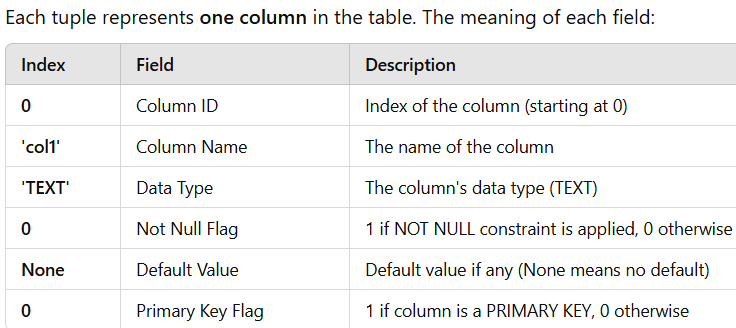

In [ ]:
cursor.execute("""
CREATE TABLE mytable (
    col1 TEXT,
    col2 INTEGER,
    col3 REAL,
    col4 TEXT
);
""")

- The `cursor.execute("""...""")` function executes the provided SQL statement.
- The `CREATE TABLE` statement defines a new table named `"mytable"`.
- Each column has a specific data type:
    - `TEXT`: Stores text values (strings).
    - `INTEGER`: Stores whole numbers.
    - `REAL`: Stores floating-point numbers.
- The semicolon (`;`) marks the end of the SQL command.

In [29]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS mytable (
    col1 TEXT,
    col2 INTEGER,
    col3 REAL,
    col4 TEXT
);
""").fetchall()

[]

`CREATE TABLE IF NOT EXISTS mytable (...)`:  
- This **creates a new table** named `mytable` if it does not already exist.
- If `mytable` **already exists**, the statement does **nothing** (prevents an error).

`.fetchall()`:  
- `.fetchall()` is used to retrieve **query results** (e.g., from `SELECT` statements).
- However, `CREATE TABLE` **does not return a result set**, so `.fetchall()` is **unnecessary**.

In [30]:
result = conn.execute(
    """
    PRAGMA table_info('mytable')
    """
)
result.fetchall()

[(0, 'col1', 'TEXT', 0, None, 0),
 (1, 'col2', 'INTEGER', 0, None, 0),
 (2, 'col3', 'REAL', 0, None, 0),
 (3, 'col4', 'TEXT', 0, None, 0)]

In [22]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS mytable2 (
    col1 TEXT NOT NULL,
    col2 INTEGER NOT NULL UNIQUE,
    col3 REAL,
    col4 TEXT UNIQUE
);
""")

`CREATE TABLE IF NOT EXISTS mytable2 (...)`:  
- This **creates a new table** named `mytable2` **if it does not already exist**.
- If `mytable2` **already exists**, the command does **nothing** (prevents an error).

In [24]:
cursor.execute("""
PRAGMA table_info('mytable2')
""").fetchall()

[(0, 'col1', 'TEXT', 1, None, 0),
 (1, 'col2', 'INTEGER', 1, None, 0),
 (2, 'col3', 'REAL', 0, None, 0),
 (3, 'col4', 'TEXT', 0, None, 0)]

In [31]:
cursor.executescript(
    """
    CREATE TABLE IF NOT EXISTS mytable2 (
        col1 TEXT NOT NULL,
        col2 TEXT,
        col3 INTEGER UNIQUE,
        col4 REAL NOT NULL UNIQUE
    );
    
    CREATE TABLE IF NOT EXISTS mytable2 (
        col1 TEXT NOT NULL,
        col2 TEXT,
        col3 INTEGER UNIQUE,
        col4 REAL NOT NULL UNIQUE
    );
    """
)

1️⃣` executescript()`:  
- This method allows **executing multiple SQL commands** in a single call.
- Unlike `execute()`, it does **not support parameterized queries**. 
    
2️⃣ `CREATE TABLE IF NOT EXISTS mytable2 (...)`:  
- **Creates a table named** `mytable2` **only if it does not exist**.
The second identical `CREATE TABLE` statement has **no effect** because the table already exists.

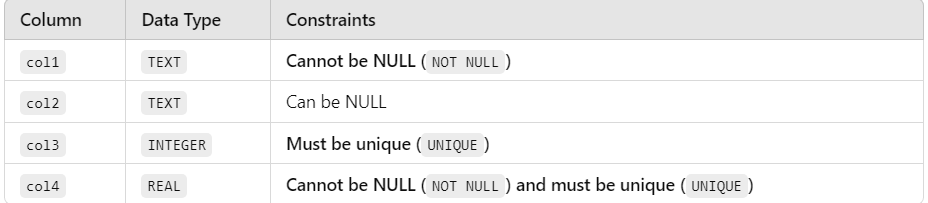

`UNIQUE` means **no duplicate values** in a column